In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
from generatePanorama import generatePanaroma, dataLoader

In [13]:
def display_network(adjacency_matrix):
    G = nx.Graph(adjacency_matrix)
    nx.draw(G, with_labels=True, font_weight='bold')
    plt.show()

In [22]:
args = {
    "featureDetection": "SIFT",
    "featureMatching": "FLANN",
    "startPoint": "degree",
    "gain": False,
    "blending": "Linear",
    "numBands": 7,
    "sigma": 1,
    "opencv": False
}

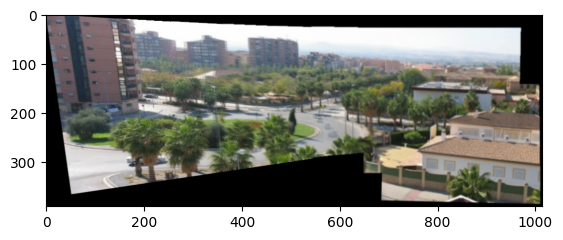

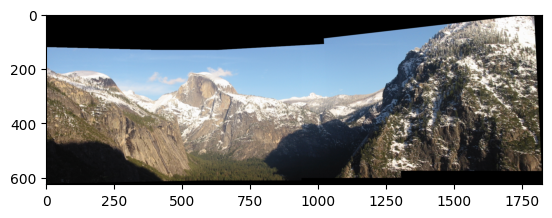

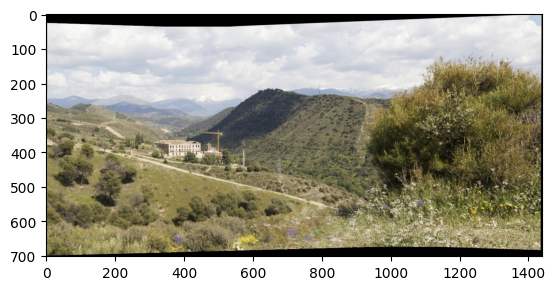

In [23]:
data_path = "./data/setSmall/"
data = dataLoader(data_path)
panos = generatePanaroma(data, args)

for pano in panos:
    plt.imshow(pano)
    plt.show()

## UDIS-D comparison

In [5]:
def UDIS_image_loader(limit=None):
    input1 = "./data/UDIS-D/input1/"
    input2 = "./data/UDIS-D/input2/"
    output = "./data/UDIS-D/Ours/"
    image_list = []
    gt_list = []
    for filename in os.listdir(input1):
        img1 = cv.imread(os.path.join(input1,filename))
        img2 = cv.imread(os.path.join(input2,filename))
        img3 = cv.imread(os.path.join(output,filename))
        image_list.append([img1,img2])
        gt_list.append(img3)
        if limit!=None and len(image_list)==limit:
            break

    return image_list, gt_list

In [20]:
def UDIS_D_Analysis():
    args_lb = {
        "featureDetection": "SIFT",
        "featureMatching": "FLANN",
        "startPoint": "matches",
        "gain": False,
        "blending": "Linear",
        "numBands": 7,
        "sigma": 1,
        "opencv": False
    }
    args_mb = {
        "featureDetection": "SIFT",
        "featureMatching": "FLANN",
        "startPoint": "matches",
        "gain": False,
        "blending": "MultiBand",
        "numBands": 7,
        "sigma": 1,
        "opencv": False
    }
    args_opencv = {
        "featureDetection": "SIFT",
        "featureMatching": "FLANN",
        "startPoint": "matches",
        "gain": False,
        "blending": "MultiBand",
        "numBands": 7,
        "sigma": 1,
        "opencv": True
    }
    udis_input, udis_gt = UDIS_image_loader(10)
    for i in range(len(udis_gt)):
        img_list = udis_input[i]
        gt = udis_gt[i]
        panos_mb = generatePanaroma(img_list, args_mb)
        panos_lb = generatePanaroma(img_list, args_lb)
        panos_ocv = generatePanaroma(img_list, args_opencv)
        pano_mb = panos_mb[0]
        pano_lb = panos_lb[0]
        pano_ocv = panos_ocv[0]
        str_i = str(i+1).zfill(6) 
        path_mb = "./data/UDIS-D/results/mb/"+str_i+".jpg"
        path_sb = "./data/UDIS-D/results/lb/"+str_i+".jpg"
        path_opencv = "./data/UDIS-D/results/opencv/"+str_i+".jpg"
        plt.imsave(path_mb,pano_mb)
        plt.imsave(path_sb,pano_lb)
        plt.imsave(path_opencv,pano_ocv)

In [21]:
UDIS_D_Analysis()

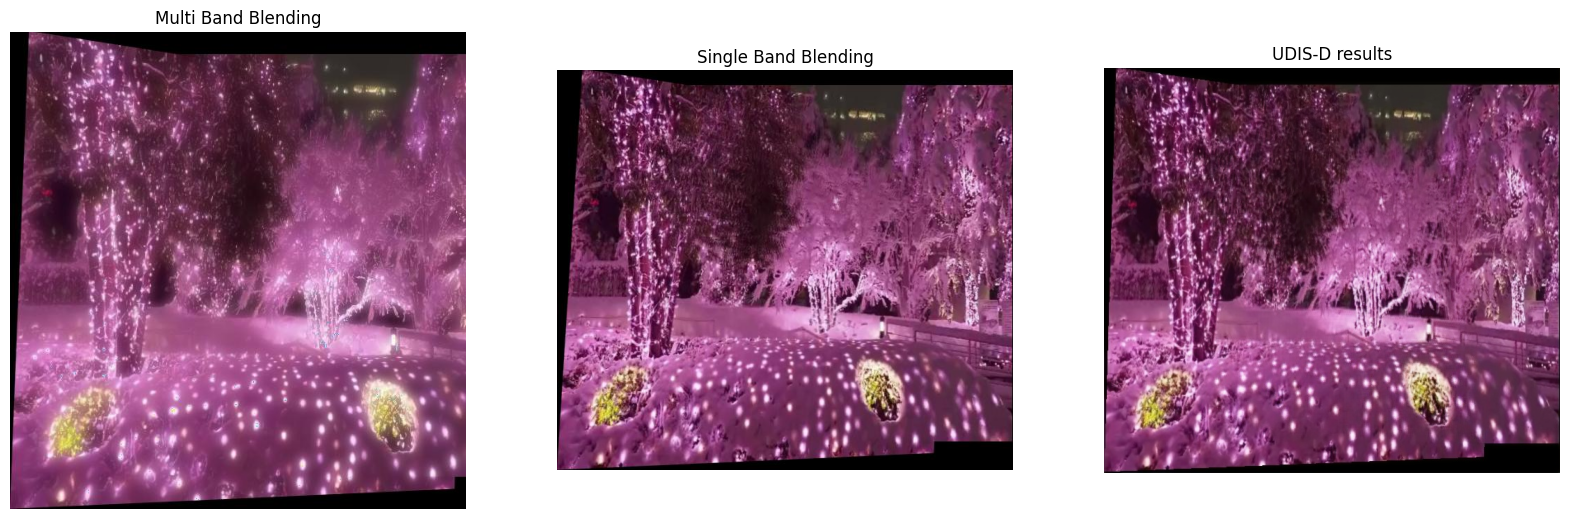

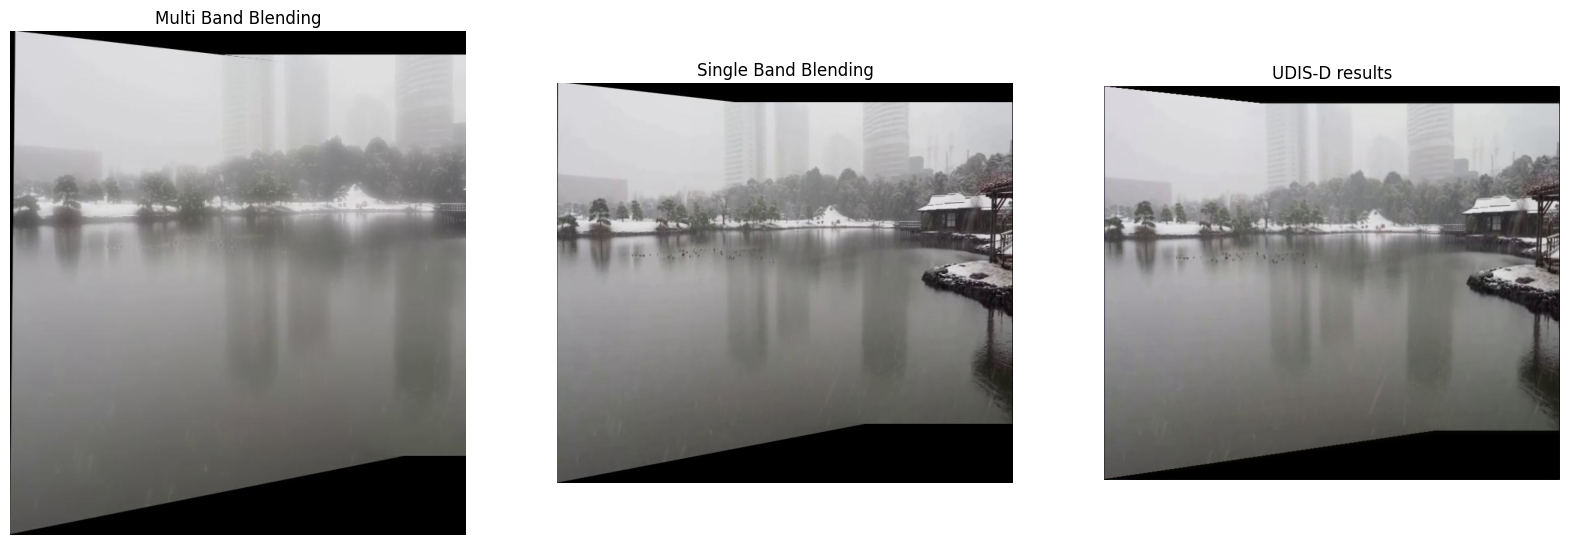

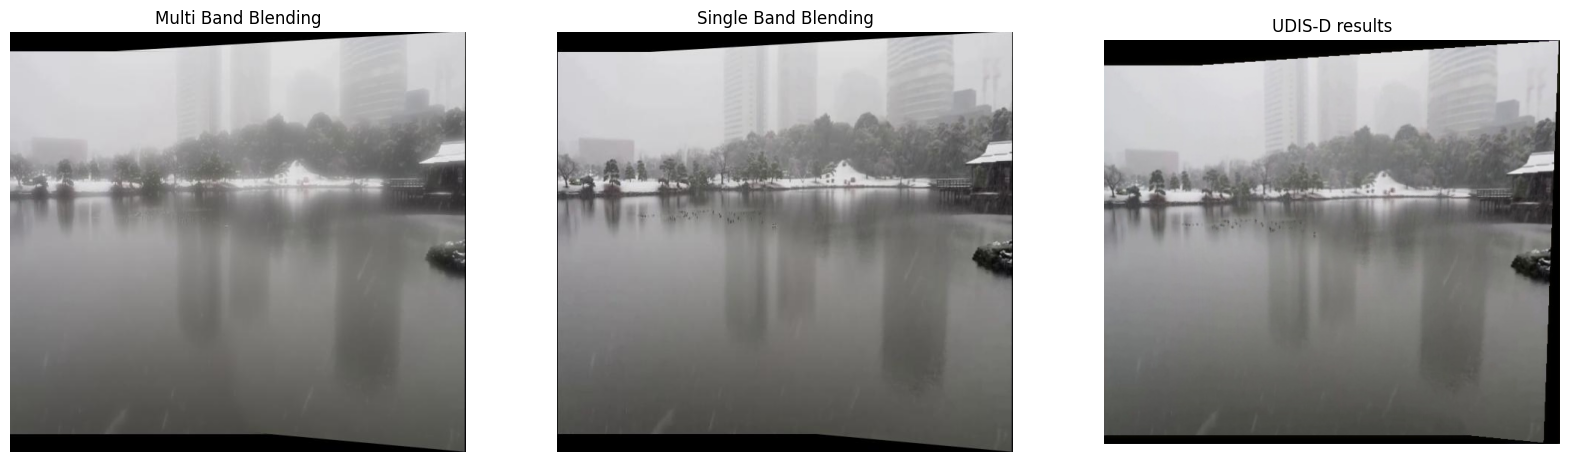

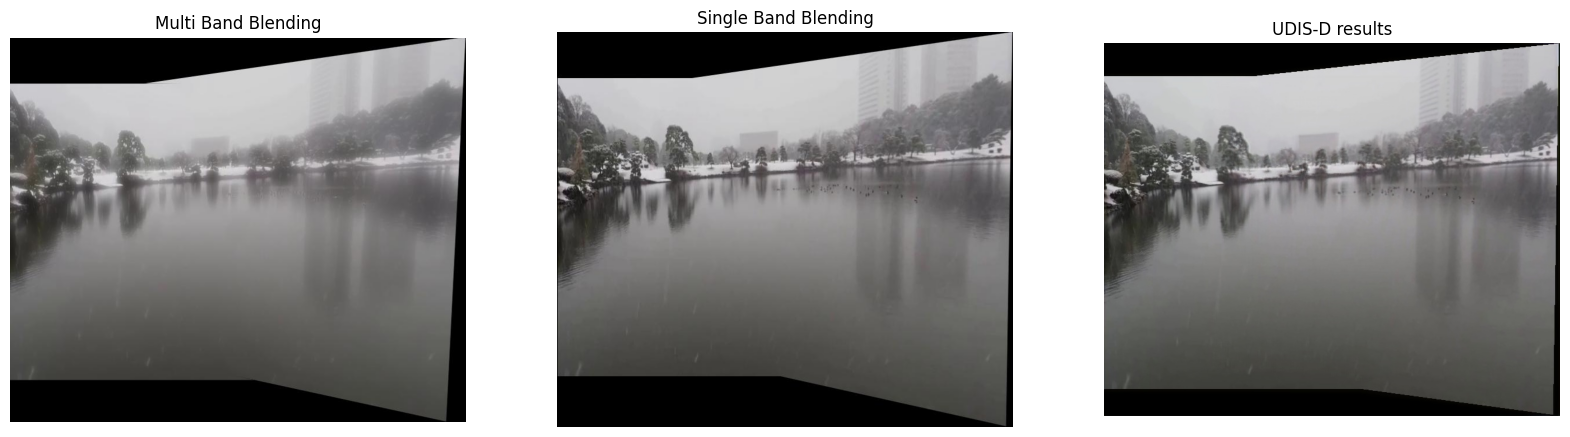

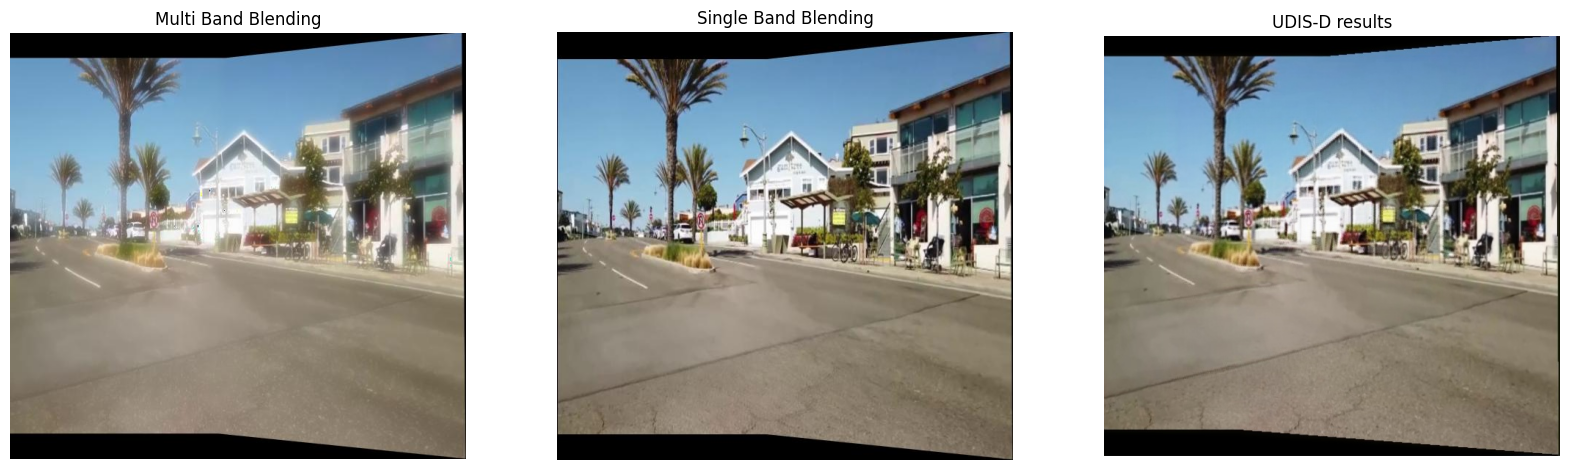

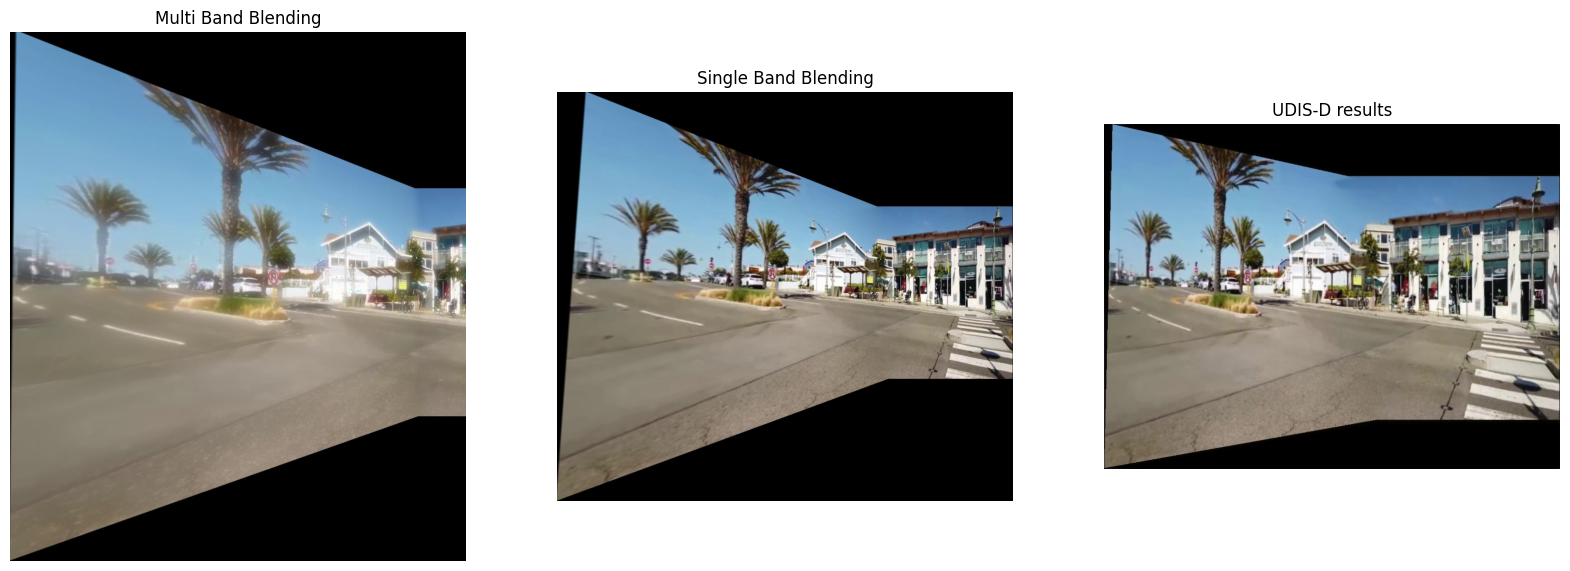

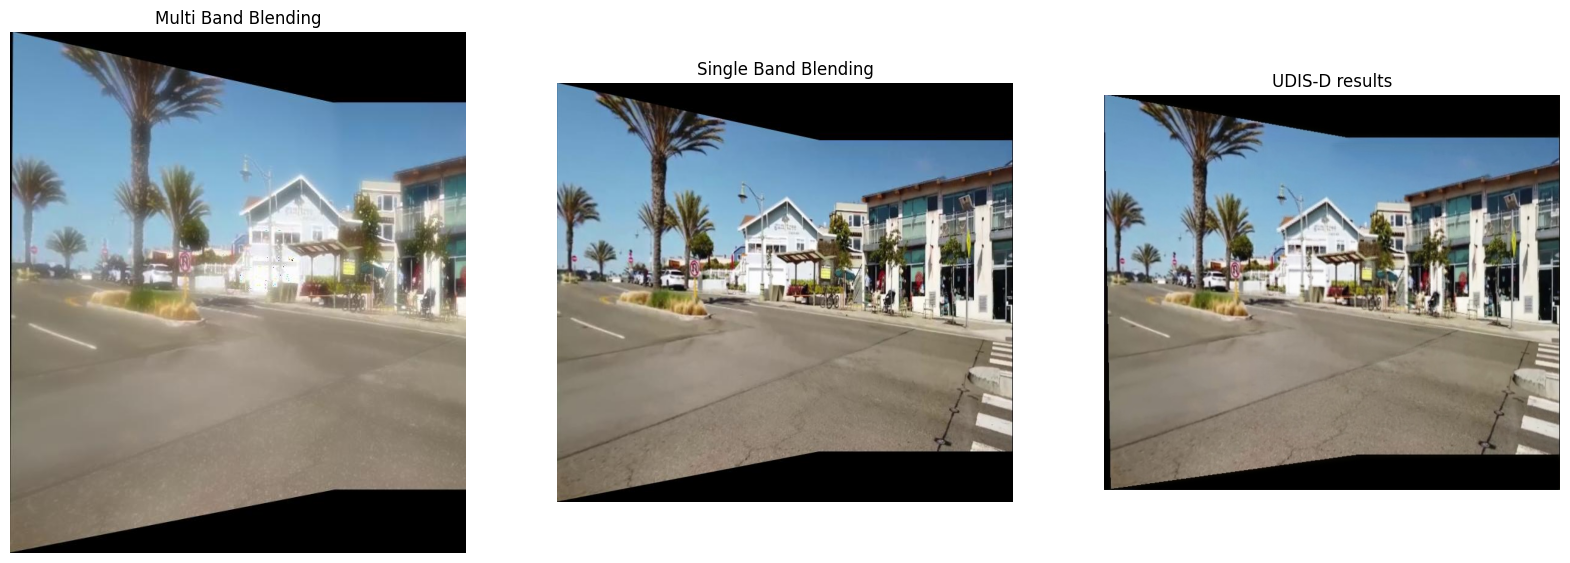

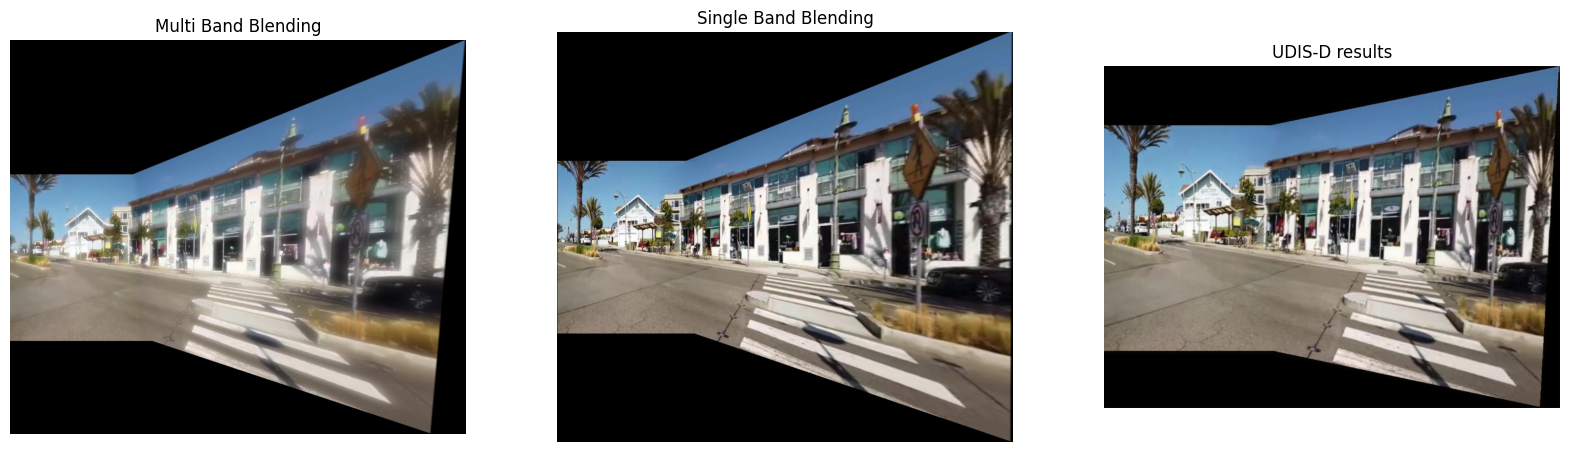

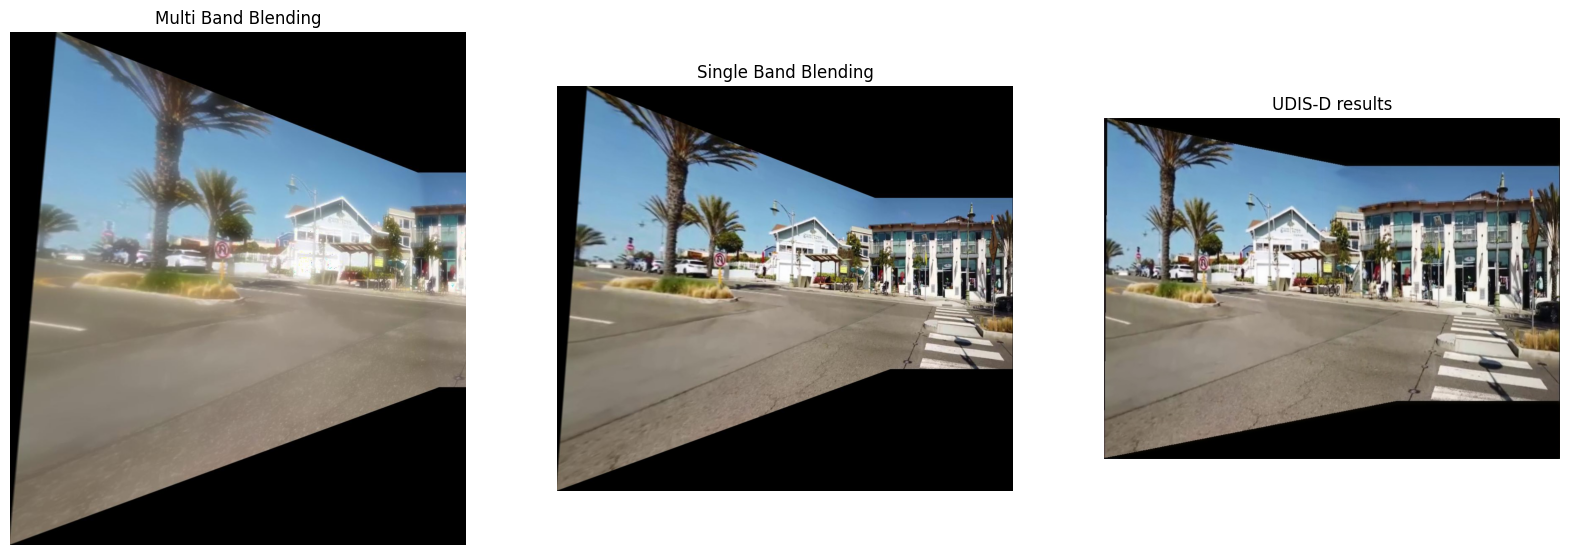

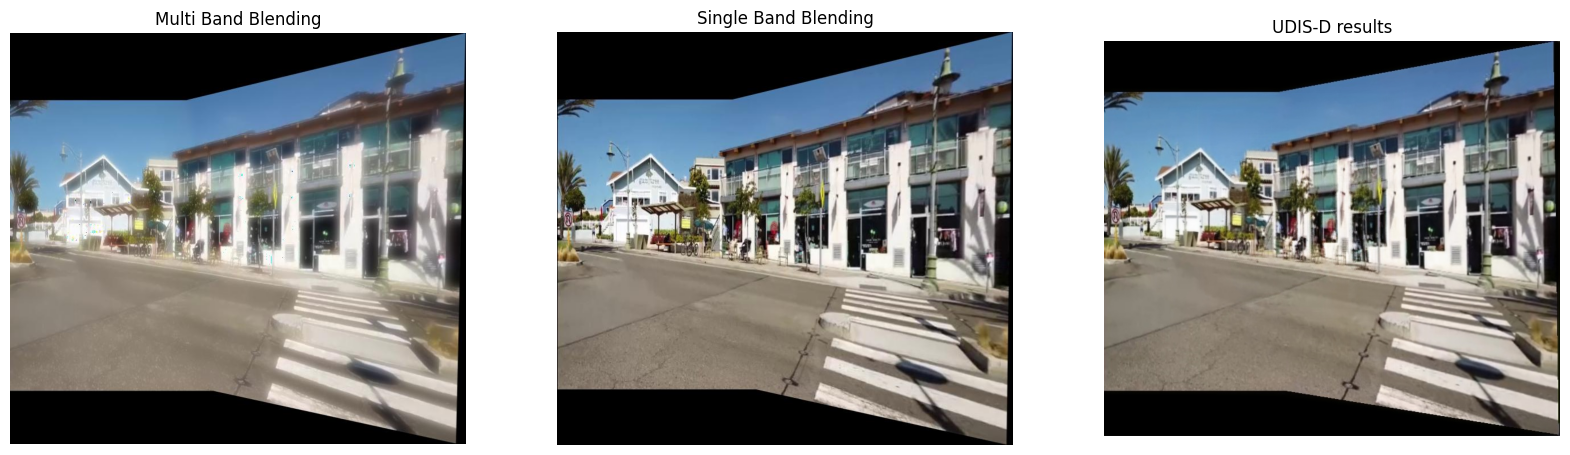

In [24]:
# compare plots
mb_path = "./data/UDIS-D/results/mb/"
sb_path = "./data/UDIS-D/results/lb/"
gt_path = "./data/UDIS-D/Ours/"
mb_list = []
sb_list = []
gt_list = []

for filename in os.listdir(mb_path):
    img = cv.imread(os.path.join(mb_path,filename))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    mb_list.append(img)

for filename in os.listdir(sb_path):
    img = cv.imread(os.path.join(sb_path,filename))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    sb_list.append(img)

for filename in os.listdir(gt_path):
    img = cv.imread(os.path.join(gt_path,filename))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    gt_list.append(img)

# Plot the images
for i in range(len(mb_list)):
    fig, axs = plt.subplots(1,3,figsize=(20,10))
    axs[0].imshow(mb_list[i])
    axs[0].axis('off')
    axs[0].set_title("Multi Band Blending")
    axs[1].imshow(sb_list[i])
    axs[1].axis('off')
    axs[1].set_title("Single Band Blending")
    axs[2].imshow(gt_list[i])
    axs[2].axis('off')
    axs[2].set_title("UDIS-D results")
    str_i = str(i+1).zfill(6)
    path = "./data/UDIS-D/results/combined/"+str_i+".png"
    plt.savefig(path)
    # plt.show()